In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Load model data

In [74]:
model_df = pd.read_csv("../data/processed/model_df.csv")

In [75]:
clustering_df = model_df.copy()

In [76]:
clustering_df.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'phone', 'city',
       'signup_date', 'age', 'gender', 'total_trips', 'cancelled_trips',
       'days_since_last_trip', 'churned', 'engagement_score', 'loyalty_score',
       'persona', 'signup_channel', 'income_level', 'payment_method',
       'device_type', 'trips_30d', 'completed_trips_30d',
       'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'promo_used_trips_30d',
       'last_trip_date', 'recency_days', 'app_open', 'ride_completed',
       'ride_request', 'search', 'total_events_30d', 'promos_redeemed_30d',
       'promo_cost_30d', 'avg_discount_value_30d'],
      dtype='object')

In [77]:
clustering_df.drop(['customer_id', 'first_name', 'last_name', 'email', 'phone', 'signup_date', 'cancelled_trips', 'days_since_last_trip', 'churned',
       'engagement_score', 'persona', 'signup_channel', 'completed_trips_30d', 'promo_used_trips_30d', 'last_trip_date', 'app_open',
       'promo_cost_30d', 'avg_discount_value_30d', 'payment_method','device_type'], axis=1, inplace=True)

##### Encode Categorical Columns

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [79]:
# Label encoding for binary categories
le = LabelEncoder()
clustering_df['gender'] = le.fit_transform(clustering_df['gender'])

# One-hot encoding for multi-class categorical variables
clustering_df = pd.get_dummies(clustering_df,
    columns=[
        "city",
        "income_level",
    ],
    drop_first=True, dtype=int
)



#### Scaling numerical columns

In [80]:
num_cols = [ 'age', 'total_trips', 'loyalty_score',
       'trips_30d', 'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'recency_days',
       'ride_completed', 'ride_request', 'search', 'total_events_30d',
       'promos_redeemed_30d']

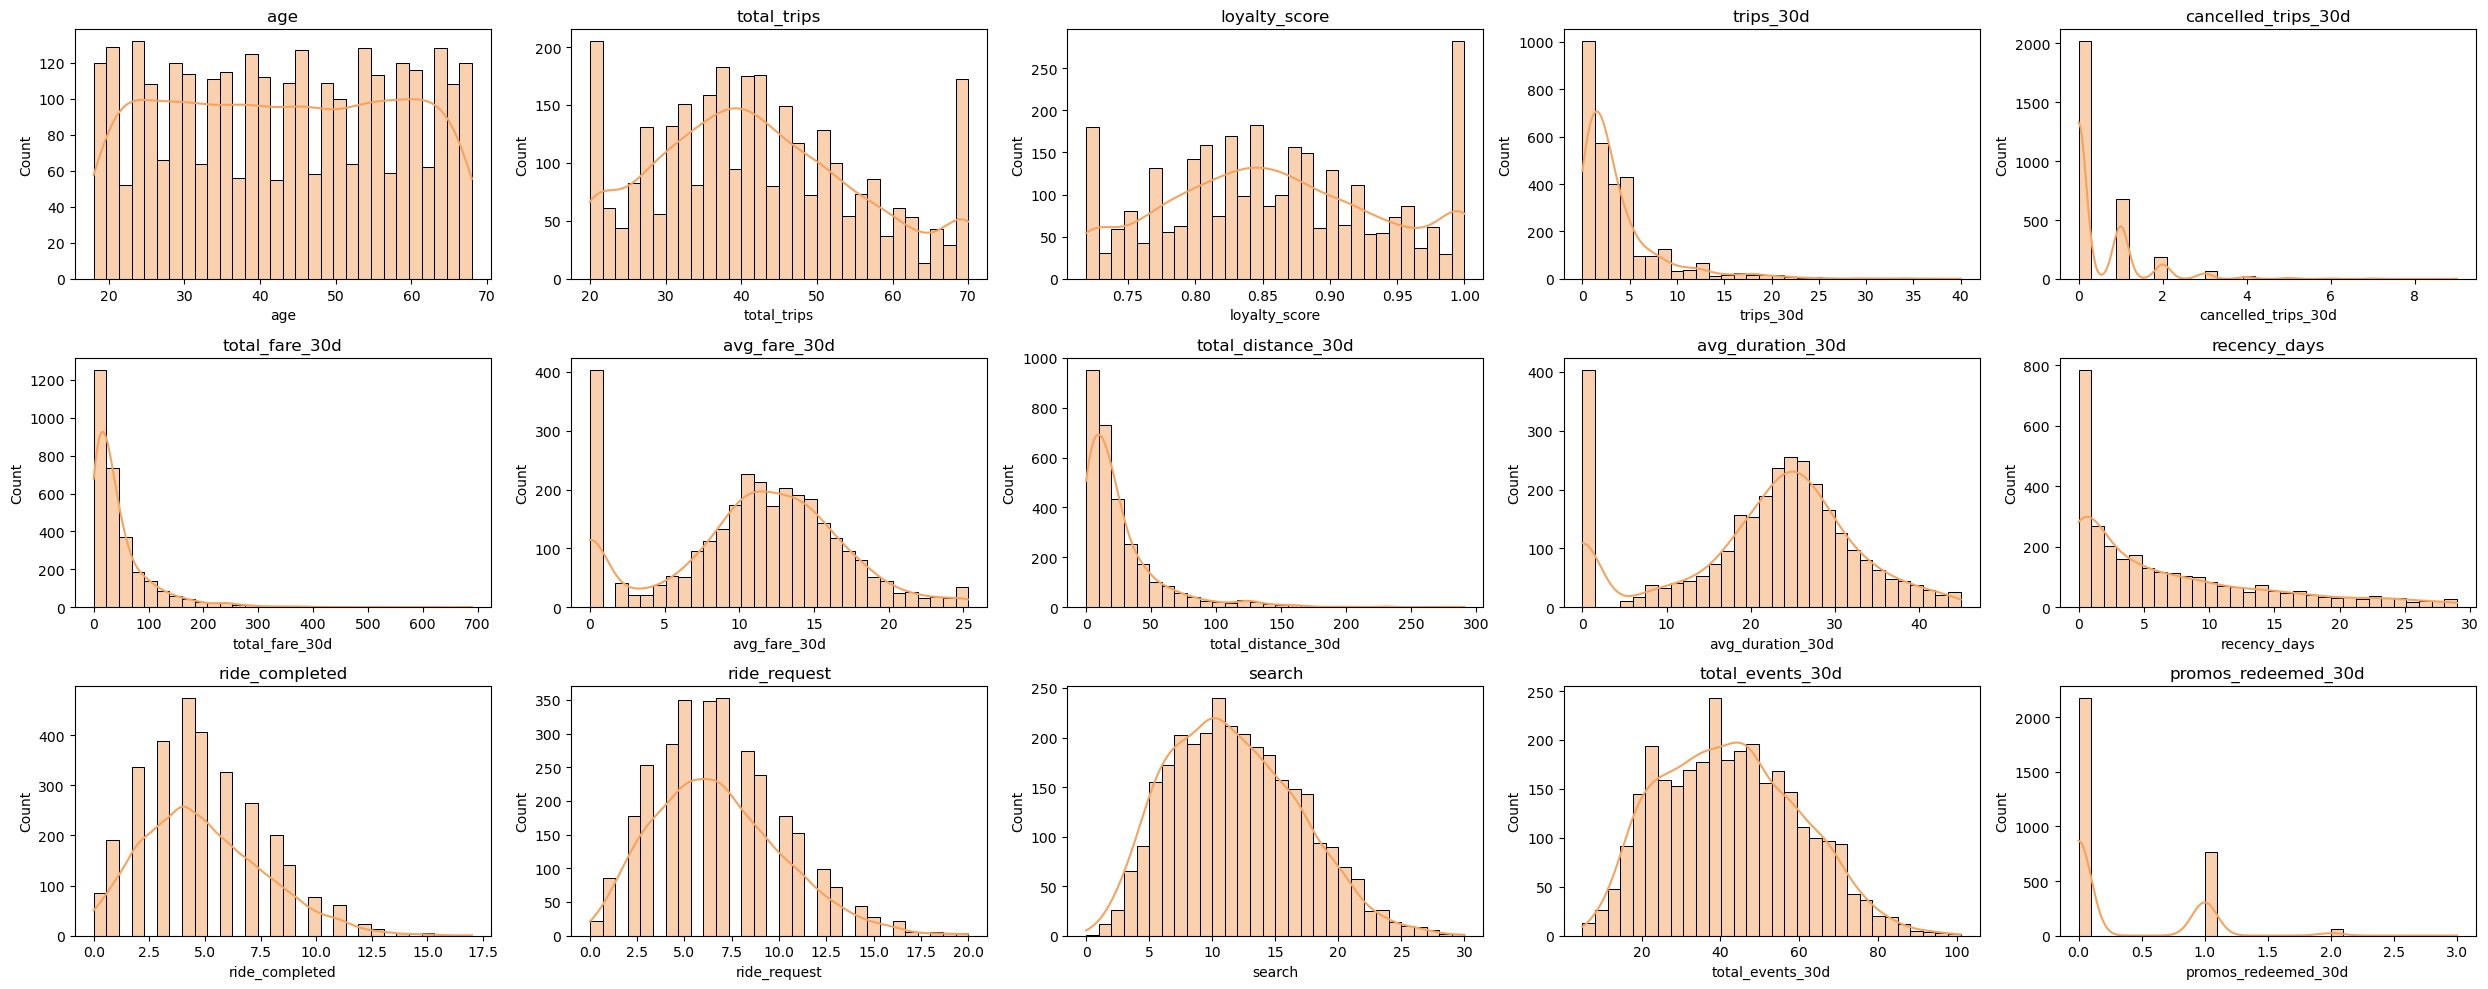

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25,10))
ax=ax.flatten()
for idx, col in enumerate(num_cols):
    sns.histplot(clustering_df[col], ax=ax[idx], color="Sandybrown", bins=30, kde=True)
    ax[idx].set_title(col)
    
plt.tight_layout()
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
clustering_df[num_cols] = scaler.fit_transform(clustering_df[num_cols])

In [84]:
clustering_df.head(3)

,age,gender,total_trips,loyalty_score,trips_30d,cancelled_trips_30d,total_fare_30d,avg_fare_30d,total_distance_30d,avg_duration_30d,...,ride_request,search,total_events_30d,promos_redeemed_30d,city_Barcelona,city_Berlin,city_London,city_Milan,income_level_low,income_level_medium
0,-1.609945,2,1.542709,1.658099,-0.178564,-0.548000,-0.171966,0.291346,-0.296500,-0.261769,...,-0.514747,-0.311563,-0.264237,-0.590671,0,0,1,0,0,0
1,1.218616,2,0.731158,0.802947,-0.824753,-0.548000,-0.778533,-1.814060,-0.803754,-1.956812,...,0.068426,0.471423,0.137717,-0.590671,0,0,1,0,0,0
2,-0.801785,1,0.362271,0.418748,0.036833,0.561311,0.089854,0.446582,0.103600,-0.033997,...,-1.389505,-1.486043,-1.584943,1.422979,0,0,1,0,0,0


#### Clustering

In [85]:
from sklearn.cluster import KMeans
import numpy as np

##### using elbow method

In [86]:
# error is called inertia or within-cluster sum of squares (WCSS)
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(clustering_df)
    inertia.append(model.inertia_)

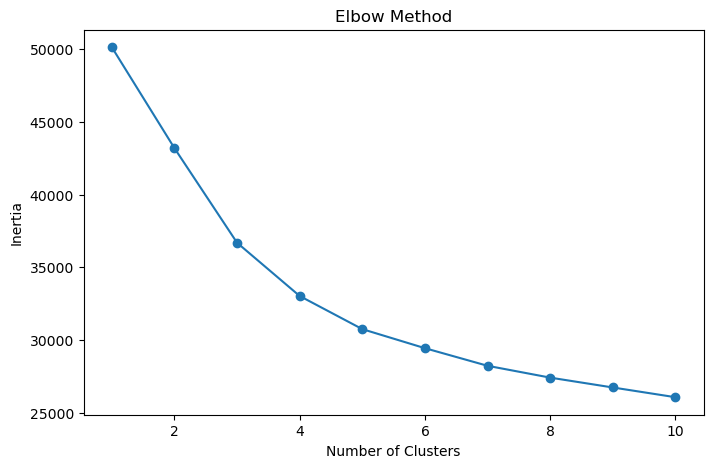

In [87]:
# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

##### Silhouette Score

###### Silhouette score to reconfirm the number of cluster

In [88]:
from sklearn.metrics import silhouette_score

In [89]:
# Compute silhouette scores
silhouette_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(clustering_df)
    silhouette_scores.append(silhouette_score(clustering_df, model.labels_))

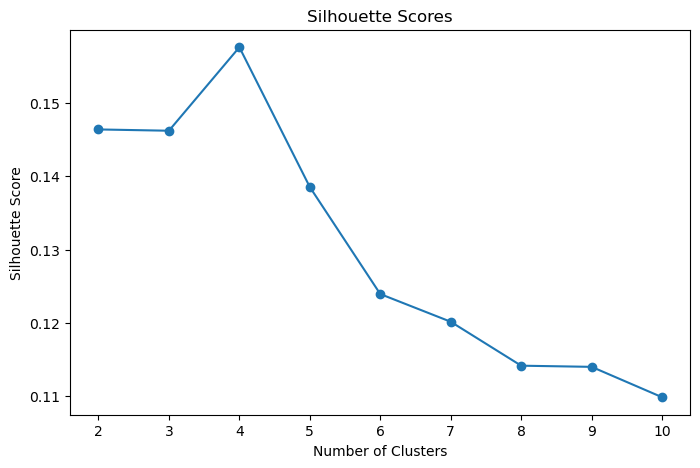

In [90]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


##### Apply K-Means Clustering

###### The optimal number of clusters is 3 (based on the above analysis).

In [91]:
# Apply K-Means clustering
optimal_k = 4
model = KMeans(n_clusters=optimal_k, random_state=42)

In [92]:
model.fit(clustering_df)

KMeans(n_clusters=4, random_state=42)

###### We will revert to using the raw data for assessment of the model

In [93]:
model.labels_

array([3, 0, 3, ..., 1, 3, 1], dtype=int32)

In [94]:
model_df['Cluster'] = model.labels_

In [95]:
model_df.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'phone', 'city',
       'signup_date', 'age', 'gender', 'total_trips', 'cancelled_trips',
       'days_since_last_trip', 'churned', 'engagement_score', 'loyalty_score',
       'persona', 'signup_channel', 'income_level', 'payment_method',
       'device_type', 'trips_30d', 'completed_trips_30d',
       'cancelled_trips_30d', 'total_fare_30d', 'avg_fare_30d',
       'total_distance_30d', 'avg_duration_30d', 'promo_used_trips_30d',
       'last_trip_date', 'recency_days', 'app_open', 'ride_completed',
       'ride_request', 'search', 'total_events_30d', 'promos_redeemed_30d',
       'promo_cost_30d', 'avg_discount_value_30d', 'Cluster'],
      dtype='object')

In [96]:
model_df.to_csv("../data/processed/model_clustered.csv", index=False)

#### Model Interpretation

###### Lets visualize relationships between key variables and the different clusters to interprete the model. Here we will use the raw data for visualizing the real properties

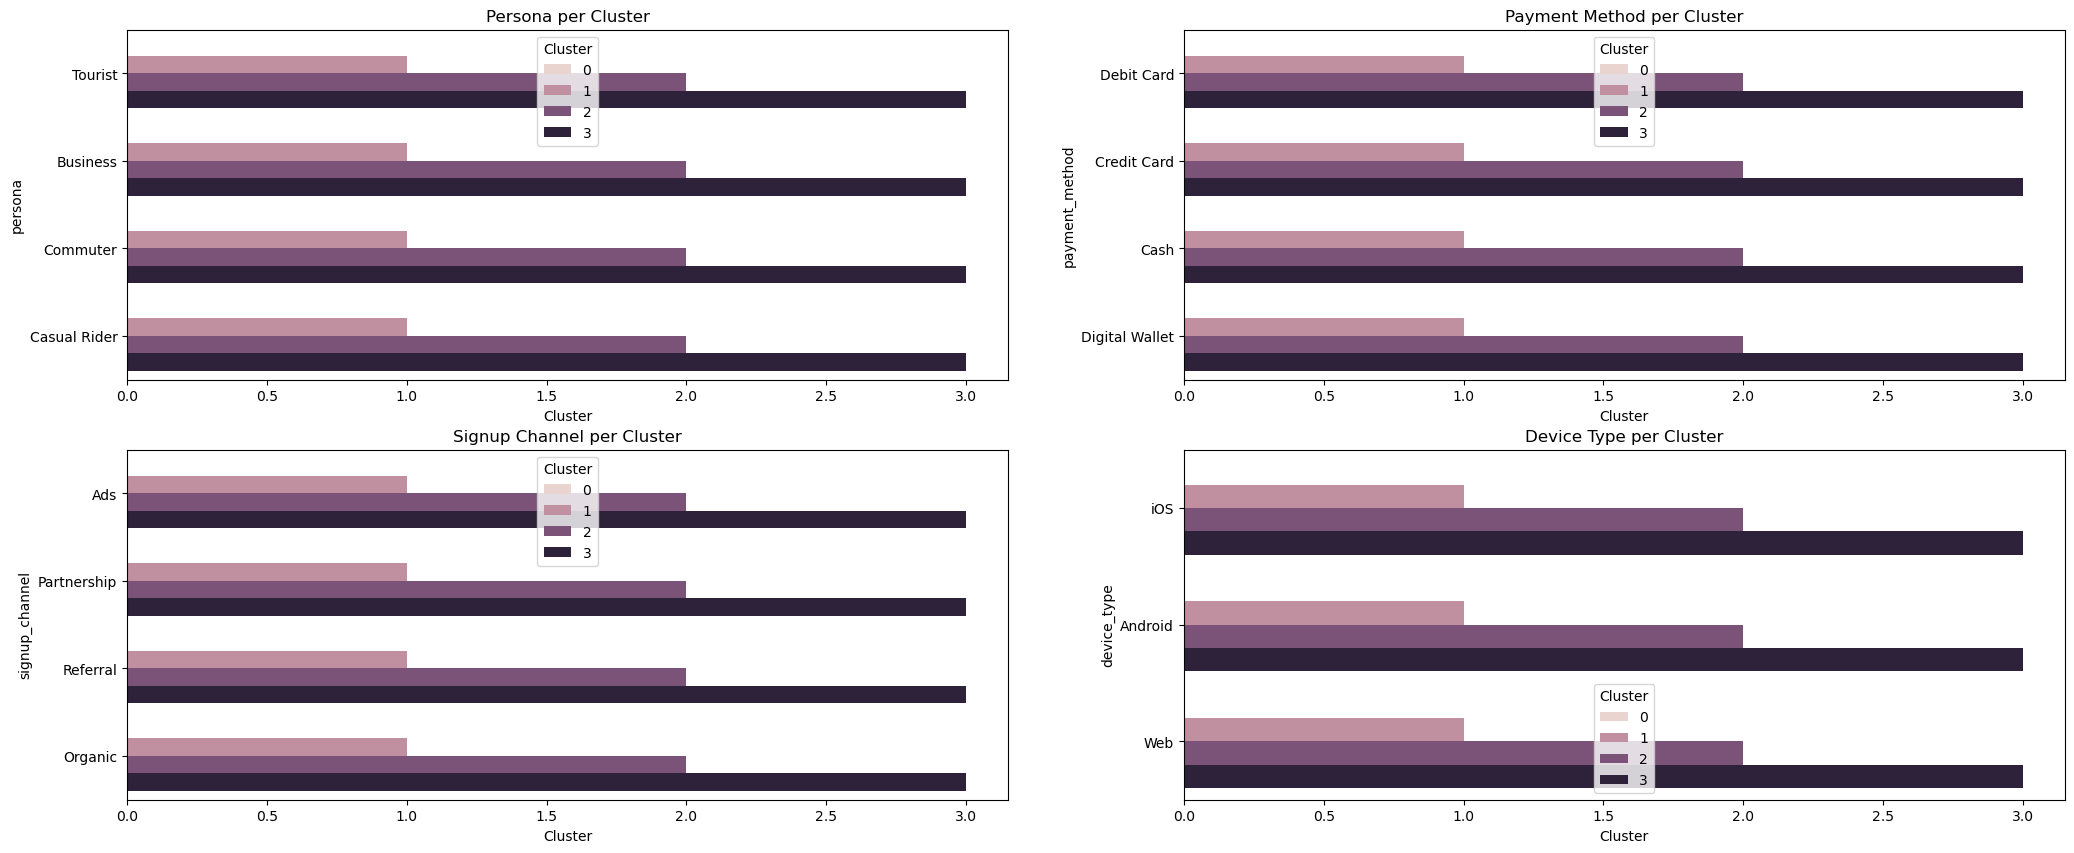

In [97]:
fig, ax =plt.subplots(nrows=2, ncols=2, figsize = (25,10))
ax=ax.flatten()

sns.barplot(x='Cluster', y='persona', hue="Cluster", data=model_df, ax=ax[0]) 
ax[0].set_title('Persona per Cluster')

sns.barplot(x='Cluster', y='payment_method', hue="Cluster", data=model_df, ax=ax[1])
ax[1].set_title('Payment Method per Cluster')

sns.barplot(x='Cluster', y='signup_channel',hue="Cluster",  data=model_df, ax=ax[2])
ax[2].set_title('Signup Channel per Cluster')

sns.barplot(x='Cluster', y='device_type',hue="Cluster",  data=model_df, ax=ax[3])
ax[3].set_title('Device Type per Cluster')

plt.show()

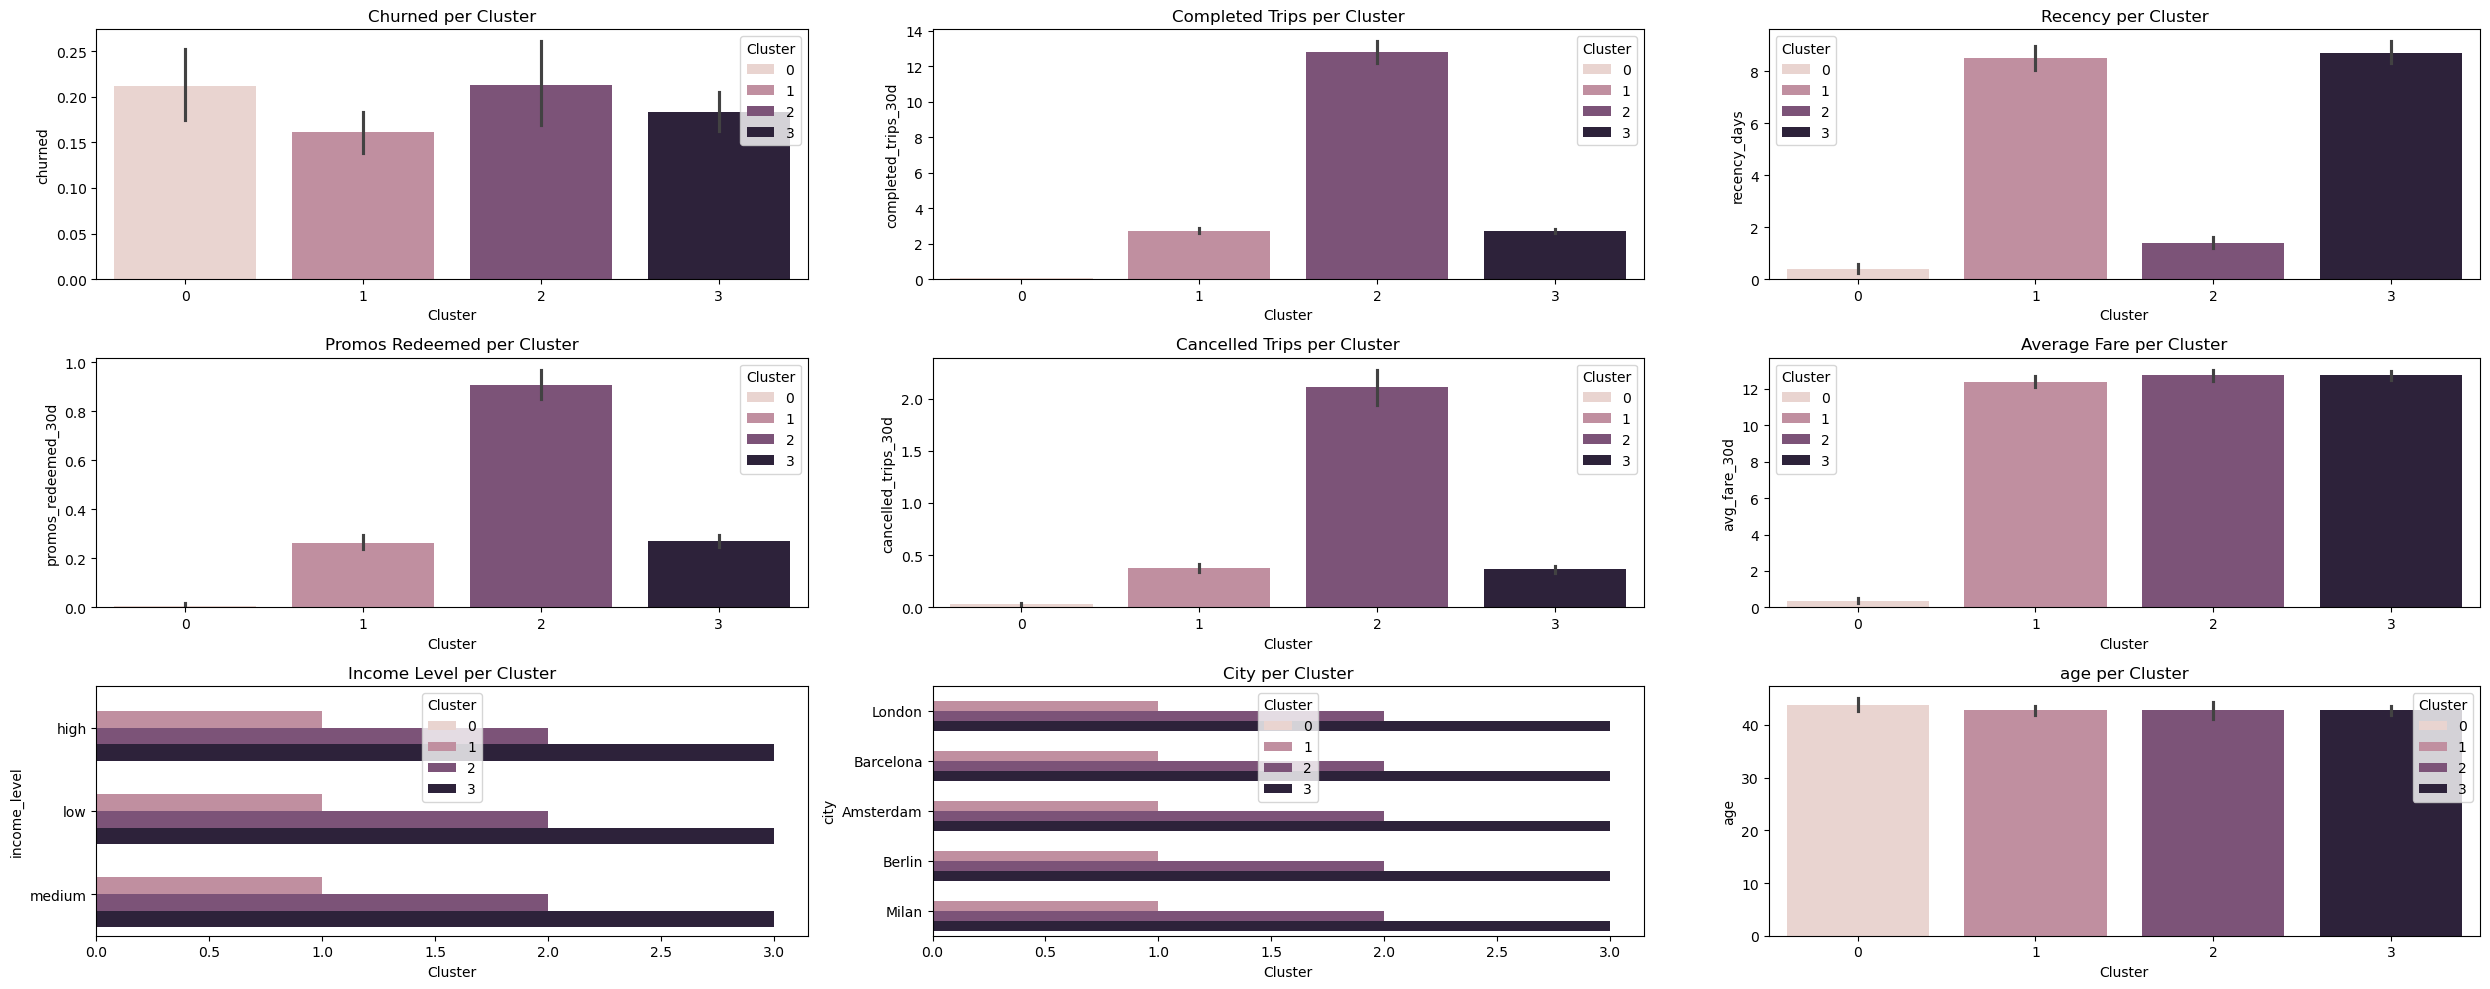

In [98]:
fig, ax =plt.subplots(nrows=3, ncols=3, figsize = (25,10))
ax=ax.flatten()

sns.barplot(x='Cluster', y='churned', hue="Cluster", data=model_df, ax=ax[0]) 
ax[0].set_title('Churned per Cluster')

sns.barplot(x='Cluster', y='completed_trips_30d', hue="Cluster", data=model_df, ax=ax[1])
ax[1].set_title('Completed Trips per Cluster')

sns.barplot(x='Cluster', y='recency_days',hue="Cluster",  data=model_df, ax=ax[2])
ax[2].set_title('Recency per Cluster')

sns.barplot(x='Cluster', y='promos_redeemed_30d',hue="Cluster",  data=model_df, ax=ax[3])
ax[3].set_title('Promos Redeemed per Cluster')

sns.barplot(x='Cluster', y='cancelled_trips_30d',hue="Cluster",  data=model_df, ax=ax[4])
ax[4].set_title('Cancelled Trips per Cluster')

sns.barplot(x='Cluster', y='avg_fare_30d',hue="Cluster",  data=model_df, ax=ax[5])
ax[5].set_title('Average Fare per Cluster')

sns.barplot(x='Cluster', y='income_level',hue="Cluster",  data=model_df, ax=ax[6])
ax[6].set_title('Income Level per Cluster')

sns.barplot(x='Cluster', y='city',hue="Cluster",  data=model_df, ax=ax[7])
ax[7].set_title('City per Cluster')

sns.barplot(x='Cluster', y='age',hue="Cluster",  data=model_df, ax=ax[8])
ax[8].set_title('age per Cluster')

plt.tight_layout()
plt.show()

##### Insight

### **Cluster 0 – New or Fading Users (High Churn Risk)**

* **Activity:** Almost no completed trips, no promo usage
* **Recency:** Very recent last activity, suggesting users are just starting to disengage
* **Churn:** High churn rate
* **Spending:** Very low average fare
* **Income & City:** Mostly low to medium income, spread across cities
* **Behaviour pattern:** Low engagement across all metrics

These users never really got going or dropped off very early.

**Recommendations:**

* Strong onboarding support
* First-ride incentives
* Simple reminders to complete the next trip

---

### **Cluster 1 – Occasional Users (Early Disengagement)**

* **Activity:** Some completed trips, low to moderate usage
* **Recency:** Long gaps between trips (around 8–9 days)
* **Churn:** Lower than Cluster 0, but still a concern
* **Spending:** Moderate average fare
* **Promos:** Some promo redemption, but not consistent
* **Income & City:** Mostly medium income, balanced across cities

These users engage occasionally but are losing habit.

**Recommendations:**

* Re-engagement campaigns
* Timed reminders and light incentives
* Encourage routine usage (weekly travel prompts)

---

### **Cluster 2 – Active but Price-Sensitive Users**

* **Activity:** Highest number of completed trips
* **Promos:** Highest promo redemption
* **Cancellations:** Highest cancellation rate
* **Recency:** Fairly recent activity
* **Spending:** High average fare, but promo-driven
* **Income & City:** Medium to high income, across cities

These users are very active but sensitive to price and experience issues.

**Recommendations:**

* Improve reliability to reduce cancellations
* Smarter, targeted promotions
* Reward consistency rather than heavy discounts

---

### **Cluster 3 – High-Value Loyal Users**

* **Activity:** Frequent trips, strong overall engagement
* **Recency:** Very recent activity
* **Churn:** Low
* **Spending:** Highest average fare
* **Promos:** Moderate usage
* **Income & City:** Higher income, concentrated in major cities

These users drive revenue and use the service regularly.

**Recommendations:**

* Loyalty rewards and VIP benefits
* Priority support
* Retain rather than discount heavily

---

## In summary

1. **Churn risk is highest in Cluster 0**, lowest in Cluster 3
2. **Revenue is driven mainly by Cluster 3**, not volume alone
3. **Promos work best for Cluster 2**, but need control
4. **Cancellations are a warning sign** for otherwise valuable users (Cluster 2)

---


| Cluster | Customer Type              | Churn Risk | Spend Level | Recommended Action      |
| ------- | -------------------------- | ---------- | ----------- | ----------------------- |
| 0       | New / fading users         | High       | Low         | Onboarding & activation |
| 1       | Occasional users           | Medium     | Medium      | Re-engagement nudges    |
| 2       | Active, promo-driven users | Medium     | Medium-High | Improve reliability     |
| 3       | Loyal high-value users     | Low        | High        | Loyalty & retention     |



##### save models

In [99]:
import pickle
import os

In [100]:
# Save the trained model, scaler, and encoders

path = "../data/processed"
os.makedirs(path, exist_ok=True)

with open(f'{path}/kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open(f'{path}/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(f'{path}/dummy_columns.pkl', 'wb') as dummy:
    pickle.dump(clustering_df.columns.tolist(), dummy)